Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd//content/drive/MyDrive/Assignment 3/Flowers-Dataset

/content/drive/MyDrive/Assignment 3/Flowers-Dataset


In [ ]:
pwd

'/content/drive/MyDrive/Assignment 3/Flowers-Dataset'

2.Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
xtrain = train_datagen.flow_from_directory('/content/drive/MyDrive/Assignment 3/Flowers-Dataset',target_size=(76,76),class_mode='categorical',batch_size=100)

Found 4353 images belonging to 1 classes.


In [ ]:
xtest = test_datagen.flow_from_directory('/content/drive/MyDrive/Assignment 3/Flowers-Dataset',target_size=(76,76),class_mode='categorical',batch_size=100)

Found 4353 images belonging to 1 classes.


In [ ]:
xtrain.class_indices

{'flowers': 0}

3.Create model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D,MaxPooling2D,Flatten, Dense

In [ ]:
model = Sequential()

4. Add layers (Convolution, MaxPooling,Flatten)

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape = (76,76,3),activation='relu'))


In [ ]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
33*(3*3*3+1)

924

Dense

In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

Output Layers

In [ ]:
model.add(Dense(4,activation='softmax'))

5.Comile the model

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
len(xtrain)

44

In [ ]:
4353/24


181.375

6.Fit the Model

In [ ]:
model.fit(xtrain,epochs = 2, validation_data= xtest,steps_per_epoch= len(xtrain),validation_steps= len(xtest))

Epoch 1/2
44/44 [==============================] - 70s 2s/step - loss: 22237.3535 - accuracy: 0.2649 - val_loss: 50014.6562 - val_accuracy: 0.0000e+00
Epoch 2/2
44/44 [==============================] - 67s 2s/step - loss: 76285.5703 - accuracy: 0.2419 - val_loss: 119170.0703 - val_accuracy: 0.0000e+00


7. Save the Model

In [ ]:
model.save('flowers.h5')

8.Test the Model

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

Testing 1


In [ ]:
img=image.load_img('/content/drive/MyDrive/Assignment 3/Flowers-Dataset/flowers/daisy/5794835_d15905c7c8_n.jpg')

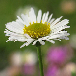

In [ ]:
img=image.load_img('/content/drive/MyDrive/Assignment 3/Flowers-Dataset/flowers/daisy/5794835_d15905c7c8_n.jpg', target_size=(76,76))
img

In [ ]:
x = image.img_to_array(img)
x

array([[[ 75.,  89.,  36.],
        [ 78.,  93.,  38.],
        [ 77.,  92.,  35.],
        ...,
        [ 91.,  93.,  53.],
        [ 89.,  90.,  50.],
        [ 80.,  91.,  48.]],

       [[ 76.,  91.,  34.],
        [ 79.,  94.,  35.],
        [ 79.,  94.,  37.],
        ...,
        [105., 100.,  60.],
        [ 99.,  96.,  55.],
        [ 87.,  92.,  51.]],

       [[ 78.,  93.,  38.],
        [ 80.,  95.,  38.],
        [ 82.,  97.,  38.],
        ...,
        [111., 106.,  64.],
        [107., 102.,  60.],
        [ 95.,  93.,  54.]],

       ...,

       [[128., 119., 110.],
        [130., 126., 114.],
        [133., 129., 117.],
        ...,
        [ 92., 121.,  57.],
        [ 91., 117.,  56.],
        [101., 111.,  61.]],

       [[134., 128., 116.],
        [139., 136., 121.],
        [143., 137., 125.],
        ...,
        [ 74., 105.,  45.],
        [ 77., 102.,  47.],
        [ 86.,  98.,  52.]],

       [[142., 133., 124.],
        [145., 137., 126.],
        [146., 1

In [ ]:
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
pred

1/1 [==============================] - 0s 141ms/step


1

In [ ]:
op = ['daisy','dandelion','rose','sunflower','tulip']
op[pred]

'dandelion'

Testing 2

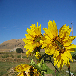

In [ ]:
img = image.load_img('/content/drive/MyDrive/Assignment 3/Flowers-Dataset/flowers/sunflower/45045005_57354ee844.jpg',target_size=(76,76))
img

In [ ]:
x = image.img_to_array(img)
x

array([[[ 30.,  65., 129.],
        [ 30.,  70., 132.],
        [ 31.,  72., 134.],
        ...,
        [ 41.,  84., 153.],
        [ 43.,  83., 153.],
        [ 39.,  79., 149.]],

       [[ 34.,  69., 133.],
        [ 31.,  72., 136.],
        [ 33.,  77., 140.],
        ...,
        [ 41.,  88., 156.],
        [ 41.,  86., 154.],
        [ 41.,  84., 152.]],

       [[ 32.,  76., 139.],
        [ 33.,  74., 140.],
        [ 35.,  81., 143.],
        ...,
        [ 43.,  90., 160.],
        [ 43.,  87., 160.],
        [ 43.,  86., 155.]],

       ...,

       [[ 74.,  77.,  32.],
        [ 63.,  70.,  29.],
        [ 71.,  78.,  36.],
        ...,
        [ 91., 119.,  68.],
        [ 64.,  80.,  33.],
        [ 71.,  90.,  35.]],

       [[ 90.,  87.,  46.],
        [ 59.,  63.,  26.],
        [ 49.,  64.,  33.],
        ...,
        [  0.,  17.,   1.],
        [ 76.,  84.,  45.],
        [ 81.,  87.,  39.]],

       [[ 55.,  61.,  25.],
        [ 76.,  72.,  35.],
        [105.,  

In [ ]:
x = np.expand_dims(x,axis = 0)

In [ ]:
pred = np.argmax(model.predict(x))
pred

1/1 [==============================] - 0s 32ms/step


1

In [ ]:
op = ['daisy','dandelion','rose','sunflower','tulip']
op[pred]

'dandelion'